## Multilayer Perceptron Models with Keras

In [1]:
#importing useful libraries
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
np.random.seed(0)
#to make the random works same
import tensorflow as tf
from tensorflow.keras.datasets import reuters
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation
from tensorflow.keras.preprocessing.text import Tokenizer

print('Tensorflow version:', tf.__version__)
#to check the version of tensorflow

Tensorflow version: 2.1.0


In [3]:
#we will use Reuters dataset
#it's set of newswire and there titles
(x_train,y_train),(x_test,y_test)= reuters.load_data(num_words=10000,test_split=0.2)
#load the data using reuters modules, and will take most occuring 10k words with a plit of 20-80 in test-train

In [4]:
#to check the length of train and test dataset
print(len(x_train),'training example')
print(len(x_test),'test example')

8982 training example
2246 test example


In [7]:
#since classes are indexed from 0 to class-1 , so to check number of classes we will use argmax
num_classes=np.max(y_train)+1
print(num_classes,'classes')

46 classes


In [8]:
#Vectorization the sequence data
tokenizer=Tokenizer(num_words=10000)
x_train=tokenizer.sequences_to_matrix(x_train,mode='binary')
#will convert a list of sequences to a numpy array or matrix, where token will be a binary valued instead of tfidf or count
x_test=tokenizer.sequences_to_matrix(x_test,mode='binary')
x_train.shape,x_test.shape

((8982, 10000), (2246, 10000))

In [9]:
#now we will convert the class data i.e labels to binary values using one-hot encoding
y_train=tf.keras.utils.to_categorical(y_train,num_classes)
#this will convert the lables to categorical wise data with num classes specify the length of row
y_test=tf.keras.utils.to_categorical(y_test,num_classes)
y_train.shape,y_test.shape

((8982, 46), (2246, 46))

In [10]:
#building multilayer perceptron model
model=Sequential([
    Dense(512,input_shape=(10000,)),
    Activation('relu'),
    Dropout(0.5),
    Dense(num_classes),
    Activation('softmax')
])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 512)               5120512   
_________________________________________________________________
activation (Activation)      (None, 512)               0         
_________________________________________________________________
dropout (Dropout)            (None, 512)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 46)                23598     
_________________________________________________________________
activation_1 (Activation)    (None, 46)                0         
Total params: 5,144,110
Trainable params: 5,144,110
Non-trainable params: 0
_________________________________________________________________


In [11]:
#training the model on the dataset
from tensorflow.keras.callbacks import EarlyStopping
#to maintain the epochs perfectly
es=EarlyStopping(monitor='val_loss',patience=3,verbose=1,mode='min')
#this will take care of epochs since we set validation loss to check with if it didn't
#imporve after 3 epochs, stop training since mode is set to min

model.compile(optimizer='adam',
             loss='categorical_crossentropy',
             metrics=['accuracy'])

In [14]:
#training the model on dataset
history=model.fit(x_train,y_train,
                 epochs=100,
                 batch_size=32,
                 validation_split=0.1,
                 callbacks=[es])
#setting epochs to high since callback will take care of early stopping when validation loss doesn't improve
#setting validation to 0.1 split of dataset

Train on 8083 samples, validate on 899 samples
Epoch 1/100
8083/8083 [==============================] - 9s 1ms/sample - loss: 1.2863 - accuracy: 0.7174 - val_loss: 0.9633 - val_accuracy: 0.7987
Epoch 2/100
8083/8083 [==============================] - 9s 1ms/sample - loss: 0.4991 - accuracy: 0.8877 - val_loss: 0.8434 - val_accuracy: 0.8165
Epoch 3/100
8083/8083 [==============================] - 9s 1ms/sample - loss: 0.2782 - accuracy: 0.9401 - val_loss: 0.9024 - val_accuracy: 0.8165
Epoch 4/100
8083/8083 [==============================] - 9s 1ms/sample - loss: 0.2130 - accuracy: 0.9509 - val_loss: 0.9428 - val_accuracy: 0.8142
Epoch 5/100
8083/8083 [==============================] - 9s 1ms/sample - loss: 0.2055 - accuracy: 0.9521 - val_loss: 0.9966 - val_accuracy: 0.7987
Epoch 00005: early stopping


In [15]:
#to check the model loss and accuracy on the test data
model.evaluate(x_test,y_test,batch_size=32,verbose=1)

2246/2246 [==============================] - 1s 409us/sample - loss: 0.9556 - accuracy: 0.8032


[0.955576242449447, 0.8032057]

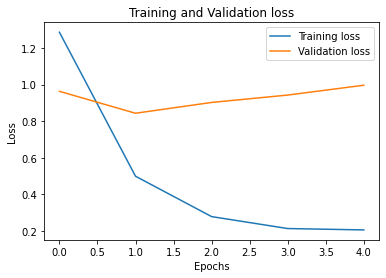

In [17]:
#plotting the training loss and validation loss along with epochs
plt.plot(history.history['loss'],label='Training loss')
plt.plot(history.history['val_loss'],label='Validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

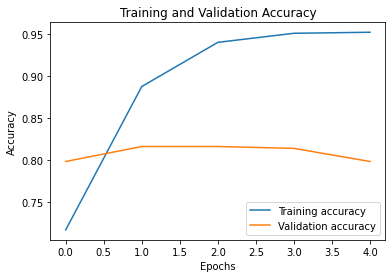

In [18]:
#plotting the training accuracy and validation accuracy along with epochs
plt.plot(history.history['accuracy'],label='Training accuracy')
plt.plot(history.history['val_accuracy'],label='Validation accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()